In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
spectrum = np.loadtxt("data_msp1000/A620EBA HgCal.mspec", delimiter=',')[:,1]

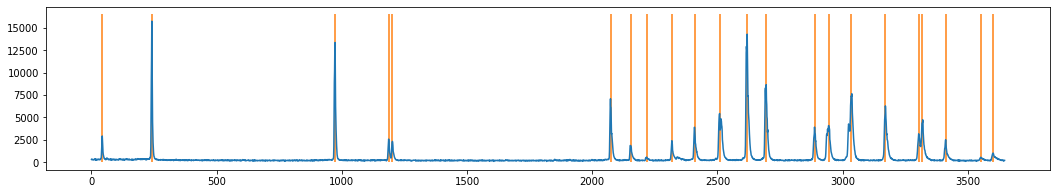

In [3]:
peaks, _ = find_peaks(spectrum, prominence=300, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=5)

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [4]:
c = Calibrator(peaks_refined, 
               num_pix=len(spectrum),
               min_wavelength=4000.,
               max_wavelength=8750.)

c.set_fit_constraints(num_slopes=5000,
                      range_tolerance=500.,
                      xbins=500,
                      ybins=500)

c.add_atlas("Hg")
c.add_atlas("Ar", min_atlas_wavelength=6500) # Ignore bluer Argon lines

INFO:rascal.calibrator:Peak at: 3801.6440429879617 A
INFO:rascal.calibrator:- matched to 3801.64404296875 A
INFO:rascal.calibrator:Peak at: 4077.8151855613987 A
INFO:rascal.calibrator:- matched to 4077.815185546875 A
INFO:rascal.calibrator:Peak at: 4916.025878859811 A
INFO:rascal.calibrator:- matched to 4916.02587890625 A
INFO:rascal.calibrator:Peak at: 5133.509359588676 A
INFO:rascal.calibrator:- matched to 5137.89306640625 A
INFO:rascal.calibrator:Peak at: 5148.807470997535 A
INFO:rascal.calibrator:Peak at: 6638.529189304801 A
INFO:rascal.calibrator:Peak at: 6888.092773516302 A
INFO:rascal.calibrator:- matched to 6888.0927734375 A
INFO:rascal.calibrator:Peak at: 7107.392578018976 A
INFO:rascal.calibrator:- matched to 7107.392578125 A
INFO:rascal.calibrator:Peak at: 7500.89746898511 A
INFO:rascal.calibrator:- matched to 7503.7763671875 A
INFO:rascal.calibrator:Peak at: 7902.473269759921 A
INFO:rascal.calibrator:Peak at: 8408.871998956005 A
INFO:rascal.calibrator:- matched to 8408.1025

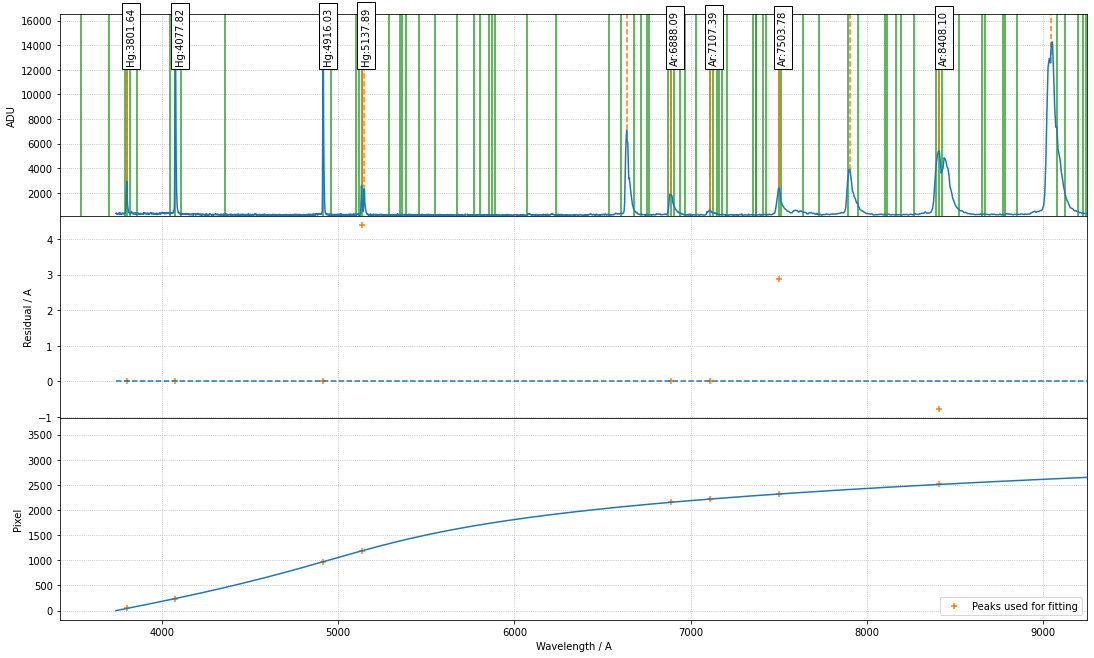

Stdev error: 3.5062223257749474e-08 A
Peaks utilisation rate: 27.27272727272727%


In [5]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=1000,
                                                candidate_weighted=True,
                                                hough_weight=1.0,
                                                filter_close=True)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=10.)

rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

NB: The peak at 8718.34 is almost certainly the N=1 image of 4358 (Hg)

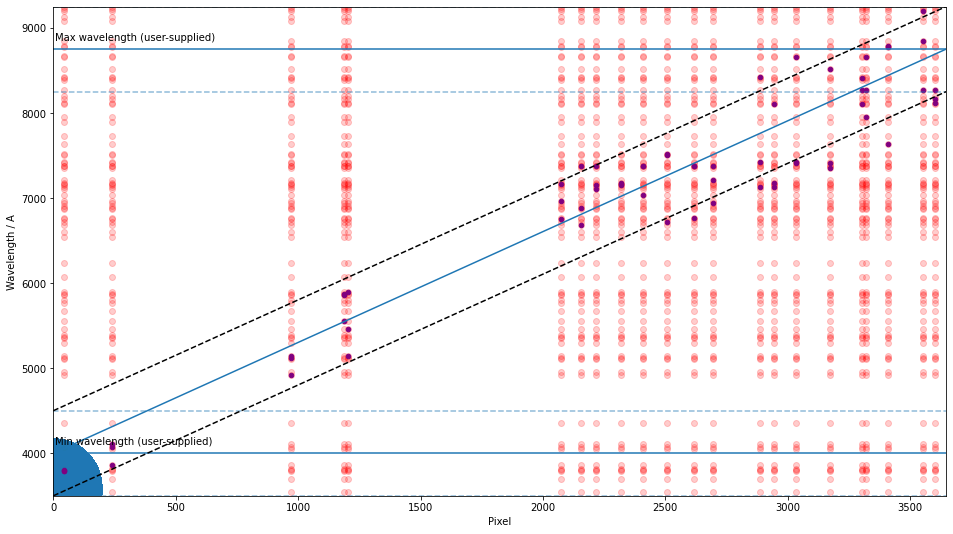

In [6]:
c.plot_search_space()